In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# DATA 607 - Machine Learning

## Class 1: Introduction

### 2025.02.24


#### Machine learning

- _Learn_, from data $(x_i, y_i)$, relationship between _variables_ $x$ and $y$.

- Relationship is _stochastic_:

  $$
  y\sim p(y\mid x)
  $$

- $p$ is _unknown_ and _unknowable_.

- Learn an approximation to $p$ itself or to its **regression function**,

  $$
  f(x) =\mathbb{E}[y\mid x].
  $$


#### Example: Predicting sales from ad spend

> "Suppose that we are statistical consultants hired by a client to
> investigate the association between advertising and sales of a particular
> product."

- We're given sales numbers and ad spend on TV, radio, and newspaper for 200 markets.

- We don't know $p$, the true distribution of sales given ad spend, but we might approximate it by the **linear model**:

  $$
  p \approx \operatorname{Normal}(\texttt{sales}\mid a + b\,\texttt{TV} + c\,\texttt{radio} + d\,\texttt{newspaper},\,\sigma^2)
  $$

- If we don't care about $\sigma^2$, we might just estimate the regression function, $f$:
  $$
  \begin{aligned}
  f(\texttt{TV},\,\texttt{radio},\,\texttt{newspaper}) &= \mathbb{E}[\texttt{sales}\mid \texttt{TV},\,\texttt{radio},\,\texttt{newspaper}]\\
  &\approx a + b\,\texttt{TV} + c\,\texttt{radio} + d\,\texttt{newspaper}
  \end{aligned}
  $$


#### Example: Credit card default prediction

- We want to predict whether a customers will default on their credit card debt based on income, monthly balance, and studentness.

- We model a customer defaulting using the **logistic regression model**:
  $$
  y\sim \operatorname{Bernoulli}\big(\texttt{default}\mid p\big),
  $$
  where
  $$
  \log\left(\frac p{1-p}\right) = a + b\,\texttt{income}+c\,\texttt{balance} + d\,\texttt{student}
  $$


#### Predictive models can inform decisions

- How can we adjust our advertising stragety to increase sales?

- Should we approve an applicants credit card application?

##### ⚠ Models don't know the big picture. ⚠

- Our advertising model doesn't know about Youtube, Facebook, TikTok, etc. It gives a single predictive model for all 200 markets, so it has no "local knowledge".

- Decision on a credit card application depends on our risk tolerance in addition to the applicant's risk. Also, we need to decide on an interest rate.


#### Inference from models

- Sometimes, it's okay to use a model as a _black box_ for generating predictions.

- Other times, we want more refined, granular understanding of the association between the target/output variable $y$ and the input/feature/predictor variables $x$.

  - Statistical hypothesis tests about model parameters.

  - Model **_interpretation_** and **_insights_**.


#### Interpreting the coefficient of a binary feature in a logistic regression model

- Odds of defaulting:&nbsp;
  $\displaystyle{{o} = \frac{p}{1-p}}$
- From the logistic regression model:

  $$
  \begin{aligned}
  \log\frac{o_{\text{student}}}
  {o_{\text{nonstudent}}} &=
  \log\left(\frac{p_{\text{student}}}{1-p_{\text{student}}}\right) - \log\left(\frac{p_{\text{nonstudent}}}{1-p_{\text{nonstudent}}}\right)\\
  &= \phantom{-}(a + b\,\texttt{income}+c\,\texttt{balance} + d\,(1))\\&\phantom{=}-(a + b\,\texttt{income}+c\,\texttt{balance} + d\,(0))\\
  &= d\\
  \frac{o_{\text{student}}}{o_{\text{nonstudent}}} &= e^{d}\approx 0.54
  \end{aligned}
  $$

- **_The odds of a student defaulting are roughly half those of a nonstudent with comparable income and balance._**


#### Exercise

- For each of the following target variables $y$, what feature variables $x$ might be associated with $y$? Would a model predicting $y$ from these $x$ be useful as _black box_ for generating predictions? Could useful inferences be drawn from such a model?

  - $y$ = weight of newborn baby

  - $y$ = demand for avocados

  - $y$ = standardized test score

  - $y$ = Customer purchased upgrade?

  - $y$ = Cancer returned within 10 years?

  - $y$ = next token


#### Fitting a `scikit-learn` model to data

```python
import pandas as pd
from sklearn.linear_model import LogisticRegression

data = pd.read_csv("data/Default.csv")
X = data[["income", "balance", "student"]]
y = data["default"]

model = LogisticRegression()
model.fit(X, y)
print(model.intercept_, model.coef_)
```

`[-10.9018116] [[ 3.96189932e-06  5.73060606e-03 -6.12564504e-01]]`


#### Using a `scikit-learn` model to predict class labels

- Will a student (resp., nonstudent) with an income of $10,000 and a balance of $1950 default?

  ```python
  x = pd.DataFrame({
      "income": [10000, 10000],
      "balance": [1950, 1950],
      "student": [1, 0]
  })
  model.predict(x)
  ```

  `array([0, 1])`

- The model perdicts that the student won't default (prediction `0`) but the nonstudent will (prediction `1`).


#### Using a `scikit-learn` model to predict probabilities

- What is the probability that a student (resp., nonstudent) with an income of $10,000 and a balance of $1950 default?

  ```python
  model.predict_proba(x)
  ```

  ```
  array([[0.57446092, 0.42553908],
       [0.42250727, 0.57749273]])
  ```

- The first column of the output is probability of class label `0` (no default); the second column is the probability of class label `1` (default).

- The predicted class label is the one with the larger probability:

  ```python
  assert np.all(model.predict_proba(x).argmax(axis=1) == model.predict(x))
  ```


#### Exercises

- **(1)** Use the probabilities from `model.predict_proba(x)` to confirm that

  $$
  \frac{o_{\text{student}}}{o_{\text{nonstudent}}} = 0.54.
  $$

- **(2)** The file `data/enrollment.csv` contains (fake) historical data on SAT scores and GPAs of university applicants, together with the scholarship they were offered and whether they ended up enrolling.

  - **(a)** Fit a logistic regression model to predict whether a student will enroll given their SAT score, GPA, and scholarship offer.

  - **(b)** Plot predicted enrollment probability versus scholarshop offer for a student with an SAT score of 1300 and a GPA of 3.3. What scholarship offer will result in an 80% chance of such a student enrolling?


In [2]:
# (a)

from sklearn.linear_model import LogisticRegression

data = pd.read_csv("data/Default.csv")
X = data[["income", "balance", "student"]]
y = data["default"]

model = LogisticRegression()
model.fit(X, y)

p_student = 0.42553908
p_nonstudent = 0.57749273

o_student = p_student / (1 - p_student)
o_nonstudent = p_nonstudent / (1 - p_nonstudent)

assert np.round(o_student / o_nonstudent, 2) == 0.54
assert np.isclose(np.log(o_student / o_nonstudent), model.coef_.squeeze()[-1])

Minimal scholarship with acceptance probability > 0.8 = $9900


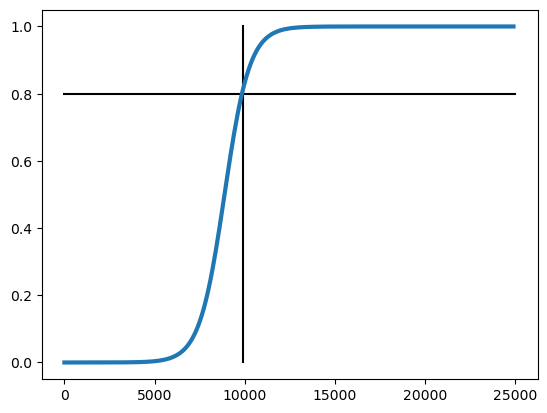

In [6]:
# (b)

data = pd.read_csv("data/enrollment.csv")
X = data[["SAT", "GPA", "scholarship"]]
y = data["enroll"]

model = LogisticRegression()
model.fit(X, y)

scholarship = np.arange(0, 25000, 100)

x = pd.DataFrame(
    {
        "SAT": [1300 for _ in scholarship],
        "GPA": [3.3 for _ in scholarship],
        "scholarship": scholarship,
    }
)

p = model.predict_proba(x)[:, 1]
s = int(scholarship[np.argmax(p > 0.8)])

plt.plot([0, 25000], [0.8, 0.8], "k")  # horizontal "threshold" line
plt.plot([s, s], [0, 1], "k")  # scholarship value exceeding threshold
plt.plot(scholarship, p, lw=3)


print(f"Minimal scholarship with acceptance probability > 0.8 = ${s}")

#### Nonparametric models

- Sometimes (often), linear models just don't fit a dataset.

- By contrast, nonparametric models are extremely flexible and can be fit to datasets displaying nonlinear patterns.

- There are tradeoffs! More on those later.


#### Example: Curve fitting


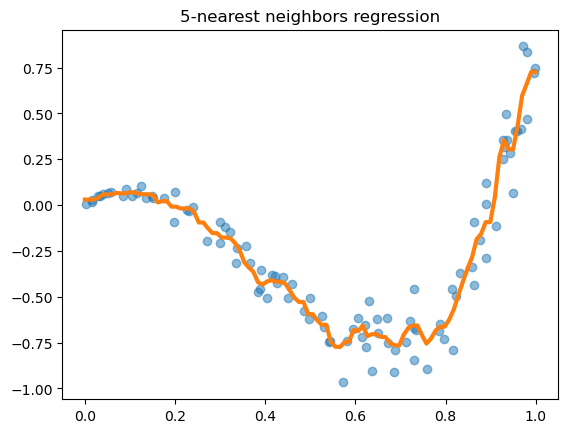

In [9]:
from sklearn.neighbors import KNeighborsRegressor


def make_data(n=100, random_state=None):
    rng = np.random.default_rng(random_state)
    x = rng.uniform(size=n)
    y = 10 * x * (x - 0.2) * (x - 0.9) + 10 * x * 0.02 * rng.normal(size=n)
    return x, y


x, y = make_data(random_state=0)
X = x.reshape(-1, 1)
plt.scatter(x, y, alpha=0.5)

model = KNeighborsRegressor()
model.fit(X, y)

u = np.linspace(0, 1, 100)
v = model.predict(u.reshape(-1, 1))
plt.title("5-nearest neighbors regression")
plt.plot(u, v, lw=3, color="C1")
plt.show()

### Nearest neighbors: How it works

- An excuse to talk about **broadcasting** in Numpy.

In [10]:
a = np.array([[1, 2, 3]])
print(a)

b = 4
print(b)

a + b

[[1 2 3]]
4


array([[5, 6, 7]])

In [11]:
a = np.array([[1, 2, 3]])
print(a)

b = np.array([[4], [5]])
print(b)

print(a + b)

A = np.array([[1, 2, 3], [1, 2, 3]])
B = np.array([[4, 4, 4], [5, 5, 5]])
print(A + B)

[[1 2 3]]
[[4]
 [5]]
[[5 6 7]
 [6 7 8]]
[[5 6 7]
 [6 7 8]]


In [30]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors()
nn.fit(X)

u = np.linspace(0, 1, 200)
U = u.reshape(-1, 1)
distances, indices = nn.kneighbors(U)
print(indices[:5])

assert np.all(distances[:, 1:] > distances[:, :-1])  # distances increase along rows
assert np.all(indices == np.abs(U - X.T).argsort(axis=1)[:, :5])  # broadcasting! 😎


w = y[indices].mean(axis=1)  # average the y-values for the nearest neighbors

assert np.allclose(w, model.predict(U))

[[11 92  3 20 13]
 [11 92  3 20 13]
 [92  3 11 20 13]
 [92  3 11 20 13]
 [ 3 92 20 13 11]]


#### Challenge exercise

1. Write your own version of `NearestNeighbors.kneighbors` to compute nearest neighbors for a $p$-dimensional dataset. (We did the $1$-dimensional case above.) Concretely, write a function that takes as input:
   - an integer `n_neighbors`;
  
   - a 2-dimensional numpy array `X_train`;
  
   - a 2-dimensional numpy array `X_test`;

   and returns a tuple `(distances, indices)`, where
  
   - `indices` is the numpy array of shape `(X_test.shape[0], n_neighbors)` whose `i`-th row lists the indices of the `n_neighbors` elements (rows) of `X_train` closest (Euclidean distance) to `X_test[i]`, listed in increasing order of distance;

   - `distance` is the numpy array of shape `(X_test.shape[0], n_neighbors)` whose `(i, j)`-entry is the distance from `X_test[i]` to `X_train[indices[i, j]]`.

   Check your work using randomly generated data and `NearestNeighbors.kneighbors`.

In [182]:
def kneighbors(n_neighbors, X_train, X_test):
    
    dists = np.linalg.norm(X_train[None, :, :] - X_test[:, None, :], axis=2)

    # Get indices of the k nearest neighbors
    indices = np.argsort(dists, axis=1)[:, :n_neighbors]

    # Sort and retrieve distances corresponding to the nearest indices
    distances = np.take_along_axis(dists, indices, axis=1)

    return distances, indices




2. Redo the previous exercise in the "scikit-learn style". 

   Instead of writing a function `kneighbors`, write a class `MyNearestNeighbors` such that:

   - It's initilization method takes a single integer argument `n_neighbors` and stores it on the instance.

   - It has a `fit` method that takes a single `ndarray` argument `X_train` and stores it on the instance.

   - It has a `kneighbors` method that takes a single `ndarray argument `X_test` as input and outputs a tuple `(indices, distances)` as in the previous exercise.

   If you identify as hard-core, use [`sklearn.utils.estimator_checks.check_estimator`](sklearn.utils.estimator_checks.check_estimator) to verify that your estimator conforms to Scikit Learn conventions. Further reading: [Developing scikit-learn estimators](https://scikit-learn.org/stable/developers/develop.html#rolling-your-own-estimator) 

In [185]:
class MyNearestNeighbors:
    def __init__(self, n_neighbors): 
        self.n_neighbors = n_neighbors

    def fit(self, X_train):
        self.X_train = X_train

    def kneighbors(self, X_test):
        dists = np.linalg.norm(self.X_train[None, :, :] - X_test[:, None, :], axis=2)

        # Get indices of the k nearest neighbors
        indices = np.argsort(dists, axis=1)[:, :self.n_neighbors]

        # Sort and retrieve distances corresponding to the nearest indices
        distances = np.take_along_axis(dists, indices, axis=1)

        return (distances, indices)

In [186]:
X_train=np.random.rand(10,2)
X_test=np.random.rand(5,2)
knn=MyNearestNeighbors(n_neighbors=5)
knn.fit(X_train)
distances, indices = knn.kneighbors(X_test)
print(indices[:5])

[[0 9 7 6 5]
 [2 1 5 6 0]
 [4 6 2 9 0]
 [4 6 9 2 0]
 [4 9 6 3 8]]


### Nearest neighbors classification

#### Choices!


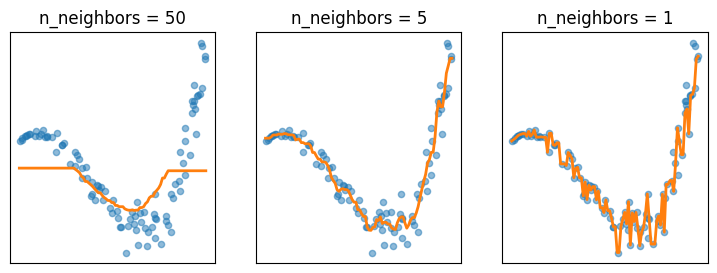

In [188]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3), sharex=True, sharey=True)

for ax, n_neighbors in zip(axes, [50, 5, 1]):
    ax.scatter(x, y, alpha=0.5, s=20)
    ax.set_xticks([])
    ax.set_yticks([])
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X, y)
    v = model.predict(u.reshape(-1, 1))
    ax.plot(u, v, lw=2, color="C1")

axes[0].set_title("n_neighbors = 50")
axes[1].set_title("n_neighbors = 5")
axes[2].set_title("n_neighbors = 1")
plt.show()

#### Quality of fit

- For regression models, the most commonly used measure of fit quality is **mean-squared error (MSE)**.

  $$
  \operatorname{MSE} = \frac1n\sum_{i<n}(y_i - \hat{f}(x_i))^2
  $$

- For the nearest neighbors fits computed above:
  <center>

  | `n_neighbors` | MSE  |
  | ------------: | ---- |
  |            50 | 0.13 |
  |             5 | 0.01 |
  |             1 | 0.00 |

  </center>

- Is the 1-nearest neighbors fit better than the 5-nearest neighbors fit?
